In [1]:
import pandas as pd

In [5]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

# Criando os nomes

In [6]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [7]:
print(f'A quantidade de nomes é: {len(nomes_f) + len(nomes_m)}')

A quantidade de nomes é: 400


In [8]:
frames = [nomes_f, nomes_m]

In [13]:
nomes = pd.concat(frames)['nome'].to_frame()

In [15]:
nomes.sample(5)

,nome
191,ERICK
36,DEBORA
153,CLEIDE
70,ISABELA
125,BENEDITA


# Incluindo ID dos Alunos

In [17]:
import numpy as np
np.random.seed(123)

In [18]:
total_alunos = len(nomes)
total_alunos

400

In [19]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [20]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [22]:
dominios = ['@dominiodoemail.com.br','@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [23]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [24]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [25]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


In [27]:
del nomes['dominio']

In [28]:
nomes

,nome,id_aluno,email
0,MARIA,235,maria@dominiodoemail.com.br
1,ANA,43,ana@servicodoemail.com
2,FRANCISCA,304,francisca@servicodoemail.com
3,ANTONIA,156,antonia@dominiodoemail.com.br
4,ADRIANA,343,adriana@servicodoemail.com
...,...,...,...
195,WALTER,231,walter@dominiodoemail.com.br
196,ARLINDO,99,arlindo@servicodoemail.com
197,MICHAEL,323,michael@dominiodoemail.com.br
198,ALVARO,383,alvaro@dominiodoemail.com.br


# Criando a Tabela Cursos

In [29]:
!pip3 install html5lib
!pip3 install lxml

In [30]:
import html5lib as html
import lxml

In [34]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [35]:
cursos = cursos[0]

# Alterando o index do cursos

In [36]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [37]:
cursos['id'] = cursos.index + 1

In [38]:
cursos.set_index('id')

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos nos cursos

In [43]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [44]:
nomes.sample(5)

,nome,id_aluno,email,matriculas
67,HENRIQUE,64,henrique@dominiodoemail.com.br,4
102,MARILENE,149,marilene@dominiodoemail.com.br,1
49,ALEX,337,alex@dominiodoemail.com.br,1
8,PATRICIA,379,patricia@servicodoemail.com,5
89,JEAN,89,jean@dominiodoemail.com.br,2


In [45]:
nomes.matriculas.describe()

count    400.000000
mean       2.030000
std        1.493209
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       13.000000
Name: matriculas, dtype: float64

In [46]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


C:\Users\Natha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

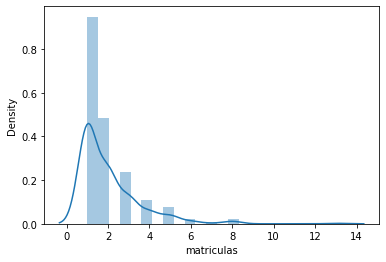

In [47]:
sns.distplot(nomes.matriculas)

In [48]:
nomes.matriculas.value_counts()

1     198
2     101
3      50
4      23
5      16
6       5
8       5
7       1
13      1
Name: matriculas, dtype: int64

In [50]:
nomes.sample(5)

,nome,id_aluno,email,matriculas
125,BENEDITA,20,benedita@dominiodoemail.com.br,1
38,JAQUELINE,76,jaqueline@servicodoemail.com,5
3,ANTONIA,156,antonia@dominiodoemail.com.br,1
190,LURDES,346,lurdes@dominiodoemail.com.br,1
40,APARECIDA,238,aparecida@servicodoemail.com,2


# Selecionando Cursos

In [51]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [53]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
    
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])    

In [54]:
matriculas.head()

,id_aluno,id_curso
0,235,3
1,235,16
2,235,0
3,43,15
4,43,6


In [59]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno':'quantidade_de_alunos'})

In [60]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,64,Lógica de programação
1,69,Java para Web
2,23,C# para Web
3,64,Ruby on Rails
4,60,Cursos de Python
5,37,PHP com MySql
6,25,.NET para web
7,17,Novas integrações com Java
8,48,TDD com Java


# Saída em diferentes formatos

In [61]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [62]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,64,Lógica de programação
1,69,Java para Web
2,23,C# para Web
3,64,Ruby on Rails
4,60,Cursos de Python
5,37,PHP com MySql
6,25,.NET para web
7,17,Novas integrações com Java
8,48,TDD com Java
9,36,Código limpo com C#


In [63]:
matriculas_json = matriculas_por_curso.to_json()

In [64]:
matriculas_json

'{"quantidade_de_alunos":{"0":64,"1":69,"2":23,"3":64,"4":60,"5":37,"6":25,"7":17,"8":48,"9":36,"10":22,"11":46,"12":51,"13":29,"14":72,"15":54,"16":4,"17":37,"18":13,"19":41},"nome_do_curso":{"0":"L\\u00f3gica de programa\\u00e7\\u00e3o","1":"Java para Web","2":"C# para Web","3":"Ruby on Rails","4":"Cursos de Python","5":"PHP com MySql","6":".NET para web","7":"Novas integra\\u00e7\\u00f5es com Java","8":"TDD com Java","9":"C\\u00f3digo limpo com C#","10":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","11":"Hardware b\\u00e1sico","12":"Persist\\u00eancia com .NET","13":"Desenvolvendo jogos","14":"An\\u00e1lise de dados","15":"Estat\\u00edstica b\\u00e1sica","16":"Internet das coisas","17":"Programa\\u00e7\\u00e3o funcional","18":"Boas pr\\u00e1ticas em Java","19":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [65]:
matriculas_html = matriculas_por_curso.to_html()

In [66]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>64</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>69</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>23</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>64</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>60</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>37</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>25</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>17</td>\n      <td>Novas integrações com Java</td>\n

# Criando um banco SQL

In [68]:
!pip install sqlalchemy

In [69]:
from sqlalchemy import create_engine, MetaData, Table

In [70]:
engine = create_engine('sqlite:///:memory:')

In [71]:
engine

Engine(sqlite:///:memory:)

In [72]:
type(engine)

sqlalchemy.engine.base.Engine

In [73]:
matriculas_por_curso.head(5)

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,64,Lógica de programação
1,69,Java para Web
2,23,C# para Web
3,64,Ruby on Rails
4,60,Cursos de Python


In [74]:
matriculas_por_curso.to_sql('matriculas', engine)

In [75]:
print(engine.table_names())

['matriculas']


<ipython-input-75-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Buscando do dado SQL

In [76]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [77]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,7,17,Novas integrações com Java
1,16,4,Internet das coisas
2,18,13,Boas práticas em Java


In [78]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso','quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,64
1,Java para Web,69
2,C# para Web,23
3,Ruby on Rails,64
4,Cursos de Python,60
5,PHP com MySql,37
6,.NET para web,25
7,Novas integrações com Java,17
8,TDD com Java,48
9,Código limpo com C#,36


In [79]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso','quantidade_de_alunos'])

In [80]:
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,64
1,Java para Web,69
3,Ruby on Rails,64
14,Análise de dados,72


# Escrevendo no banco

In [81]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [85]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


<ipython-input-85-7f622051bbf8>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Nomes dos alunos e alunas da próximas turma

In [86]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,64,Lógica de programação
1,69,Java para Web
2,23,C# para Web
3,64,Ruby on Rails
4,60,Cursos de Python


In [87]:
matriculas

,id_aluno,id_curso
0,235,3
1,235,16
2,235,0
3,43,15
4,43,6
...,...,...
807,323,19
808,383,8
809,383,7
810,366,1


In [88]:
id_curso = 16

In [110]:
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
1,235,16
255,30,16
450,113,16
725,119,16


In [111]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,email,matriculas
id_aluno,,,,
235,16,MARIA,maria@dominiodoemail.com.br,3
30,16,SEBASTIANA,sebastiana@dominiodoemail.com.br,13
113,16,FELIPE,felipe@servicodoemail.com,1
119,16,VALDEMAR,valdemar@dominiodoemail.com.br,2


In [112]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
235         MARIA
30     SEBASTIANA
113        FELIPE
119      VALDEMAR
Name: nome, dtype: object

In [113]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
235,MARIA
30,SEBASTIANA
113,FELIPE
119,VALDEMAR


In [114]:
nome_curso = cursos.loc[id_curso]

In [115]:
nome_curso

nome_do_curso    Internet das coisas
id                                17
Name: 16, dtype: object

In [116]:
nome_curso = nome_curso.nome_do_curso

In [117]:
nome_curso

'Internet das coisas'

In [118]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [119]:
type(proxima_turma)

pandas.core.frame.DataFrame

In [121]:
proxima_turma.rename(columns = {'nome':'alunos do curso de {}'.format(nome_curso)})

,alunos do curso de Internet das coisas
id_aluno,
235,MARIA
30,SEBASTIANA
113,FELIPE
119,VALDEMAR


# Excel

In [123]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [124]:
pd.read_excel('proxima_turma.xlsx')

,nome
0,MARIA
1,SEBASTIANA
2,FELIPE
3,VALDEMAR
